# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed= []
city_name = []
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="

In [4]:
i = 1
for city in cities:
    query_url = f'{url}{city}'
    response = requests.get(query_url).json()
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        city_name.append(city)
        print(f'Grabbing info for {city} (City # : {i})')
        i = i + 1
    except:
        print(f'{city} (City # : {i}) could not be fetched')
        i = i + 1

Grabbing info for martapura (City # : 1)
Grabbing info for okhotsk (City # : 2)
Grabbing info for yovon (City # : 3)
Grabbing info for cape town (City # : 4)
Grabbing info for hornepayne (City # : 5)
Grabbing info for beringovskiy (City # : 6)
Grabbing info for albany (City # : 7)
Grabbing info for langsa (City # : 8)
Grabbing info for ribeira grande (City # : 9)
Grabbing info for rikitea (City # : 10)
Grabbing info for bonavista (City # : 11)
Grabbing info for polonnaruwa (City # : 12)
Grabbing info for solnechnyy (City # : 13)
Grabbing info for faanui (City # : 14)
skagastrond (City # : 15) could not be fetched
taolanaro (City # : 16) could not be fetched
Grabbing info for bluff (City # : 17)
Grabbing info for atbasar (City # : 18)
Grabbing info for mataura (City # : 19)
louisbourg (City # : 20) could not be fetched
Grabbing info for new norfolk (City # : 21)
Grabbing info for laguna (City # : 22)
Grabbing info for bahia blanca (City # : 23)
Grabbing info for puerto ayora (City # : 2

Grabbing info for castro (City # : 195)
Grabbing info for havre (City # : 196)
formoso do araguaia (City # : 197) could not be fetched
Grabbing info for black diamond (City # : 198)
Grabbing info for maraba (City # : 199)
Grabbing info for arraial do cabo (City # : 200)
Grabbing info for zabol (City # : 201)
Grabbing info for great falls (City # : 202)
Grabbing info for pinawa (City # : 203)
Grabbing info for proti (City # : 204)
Grabbing info for dunedin (City # : 205)
Grabbing info for port moresby (City # : 206)
Grabbing info for blyznyuky (City # : 207)
Grabbing info for muroto (City # : 208)
nizhneyansk (City # : 209) could not be fetched
Grabbing info for northam (City # : 210)
Grabbing info for uige (City # : 211)
Grabbing info for kaka (City # : 212)
Grabbing info for pevek (City # : 213)
Grabbing info for kruisfontein (City # : 214)
Grabbing info for itoman (City # : 215)
Grabbing info for saint anthony (City # : 216)
Grabbing info for talnakh (City # : 217)
Grabbing info for 

sinkat (City # : 389) could not be fetched
Grabbing info for waw (City # : 390)
Grabbing info for itarema (City # : 391)
Grabbing info for kiruna (City # : 392)
Grabbing info for olafsvik (City # : 393)
Grabbing info for mopti (City # : 394)
yanan (City # : 395) could not be fetched
Grabbing info for ilo (City # : 396)
Grabbing info for prado (City # : 397)
Grabbing info for kailua (City # : 398)
Grabbing info for katsuura (City # : 399)
bacuit (City # : 400) could not be fetched
Grabbing info for launceston (City # : 401)
Grabbing info for puerto del rosario (City # : 402)
ituni (City # : 403) could not be fetched
Grabbing info for mahina (City # : 404)
Grabbing info for jacksonville beach (City # : 405)
Grabbing info for kununurra (City # : 406)
Grabbing info for muisne (City # : 407)
Grabbing info for bergen (City # : 408)
Grabbing info for ilam (City # : 409)
Grabbing info for vao (City # : 410)
Grabbing info for sao filipe (City # : 411)
Grabbing info for buala (City # : 412)
Grab

Grabbing info for dargaville (City # : 584)
Grabbing info for itaituba (City # : 585)
Grabbing info for fort-shevchenko (City # : 586)
Grabbing info for kargasok (City # : 587)
Grabbing info for mount gambier (City # : 588)
Grabbing info for afyonkarahisar (City # : 589)
Grabbing info for areosa (City # : 590)
Grabbing info for ossora (City # : 591)
Grabbing info for henties bay (City # : 592)
Grabbing info for khanpur (City # : 593)
barawe (City # : 594) could not be fetched
Grabbing info for tambopata (City # : 595)
Grabbing info for phan thiet (City # : 596)
Grabbing info for gewane (City # : 597)
Grabbing info for huarmey (City # : 598)
Grabbing info for dzilam gonzalez (City # : 599)
Grabbing info for neiafu (City # : 600)
Grabbing info for amazar (City # : 601)
Grabbing info for rocha (City # : 602)
Grabbing info for envira (City # : 603)
Grabbing info for yamada (City # : 604)
Grabbing info for beaverlodge (City # : 605)


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
dictionary = {
    "City": city_name,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Lat" : lat,
    "Lng" : lng,
    "Max Temp" : max_temp,
    "Wind Speed" : wind_speed
}
weather_df = pd.DataFrame(dictionary)
weather_df.to_csv("weather_data.csv")
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,martapura,75,ID,1586623456,100,-3.42,114.85,25.00,1.50
1,okhotsk,97,RU,1586623456,96,59.38,143.30,-4.03,0.76
2,yovon,40,TJ,1586623456,93,38.31,69.04,14.00,2.00
3,cape town,40,ZA,1586622832,88,-33.93,18.42,19.44,8.20
4,hornepayne,95,CA,1586623457,74,49.21,-84.77,3.03,4.53
5,beringovskiy,94,RU,1586623068,93,63.05,179.32,-13.82,4.92
6,albany,75,US,1586623160,36,42.60,-73.97,8.89,9.80
7,langsa,58,ID,1586623457,87,4.47,97.97,25.15,1.38
8,ribeira grande,20,PT,1586623055,77,38.52,-28.70,18.00,2.10
9,rikitea,94,PF,1586622809,74,-23.12,-134.97,24.85,1.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

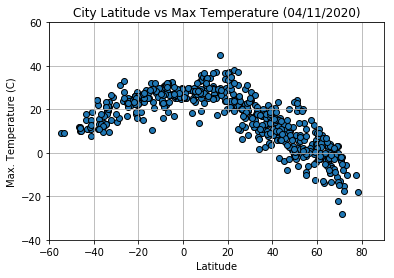

In [18]:
today = time.strftime("%m/%d/%Y")
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker='o',edgecolors="black")
plt.title(f"City Latitude vs Max Temperature ({today})")
plt.ylim(-40,60)
plt.xlim(-60, 90)
plt.grid()
plt.ylabel("Max. Temperature (C)")
plt.xlabel("Latitude")
plt.savefig("Latitude_vs_Max_Temp.png")

#### Latitude vs. Humidity Plot

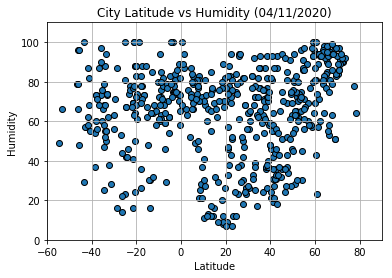

In [20]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker='o',edgecolors="black")
plt.title(f"City Latitude vs Humidity ({today})")
plt.ylim(0,110)
plt.xlim(-60, 90)
plt.grid()
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.savefig("Latitude_vs_Humidity.png")

#### Latitude vs. Cloudiness Plot

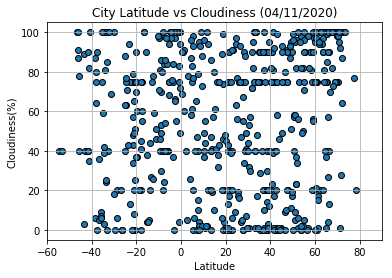

In [21]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker='o',edgecolors="black")
plt.title(f"City Latitude vs Cloudiness ({today})")
plt.ylim(-5,105)
plt.xlim(-60, 90)
plt.grid()
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.savefig("Latitude_vs_Cloudiness.png")

#### Latitude vs. Wind Speed Plot

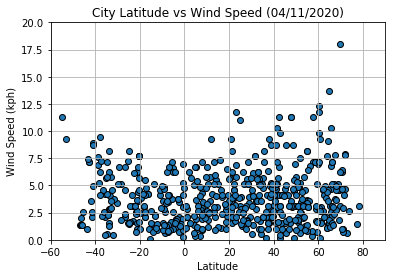

In [23]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker='o',edgecolors="black")
plt.title(f"City Latitude vs Wind Speed ({today})")
plt.ylim(0,20)
plt.xlim(-60, 90)
plt.grid()
plt.ylabel("Wind Speed (kph)")
plt.xlabel("Latitude")
plt.savefig("Latitude_vs_Wind_speed.png")

## Linear Regression

In [25]:
# OPTIONAL: Create a function to create Linear Regression plots

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,okhotsk,97,RU,1586623456,96,59.38,143.30,-4.03,0.76
2,yovon,40,TJ,1586623456,93,38.31,69.04,14.00,2.00
4,hornepayne,95,CA,1586623457,74,49.21,-84.77,3.03,4.53
5,beringovskiy,94,RU,1586623068,93,63.05,179.32,-13.82,4.92
6,albany,75,US,1586623160,36,42.60,-73.97,8.89,9.80
7,langsa,58,ID,1586623457,87,4.47,97.97,25.15,1.38
8,ribeira grande,20,PT,1586623055,77,38.52,-28.70,18.00,2.10
10,bonavista,91,CA,1586623457,91,48.65,-53.11,1.14,8.76
11,polonnaruwa,4,LK,1586623457,83,7.93,81.00,25.09,0.93
12,solnechnyy,58,RU,1586623212,80,50.72,136.63,-0.14,1.68


In [78]:
# Create Northern and Southern Hemisphere DataFrames
nor_hemi = weather_df.loc[weather_df["Lat"]>0]
sou_hemi = weather_df.loc[weather_df["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8668879443476345


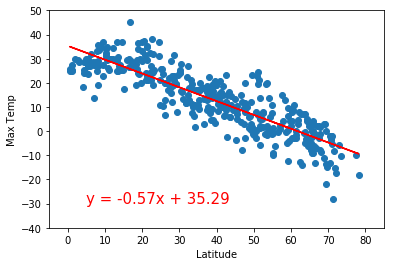

In [33]:
x = nor_hemi['Lat']
y = nor_hemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_line = (slope * x) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_line,"r-")
plt.annotate(line_eq,(5,-30),fontsize=15,color="red")
plt.ylim(-40,50)
plt.xlim(-5, 85)
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
print(f'The r-squared is: {rvalue}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7519957450017999


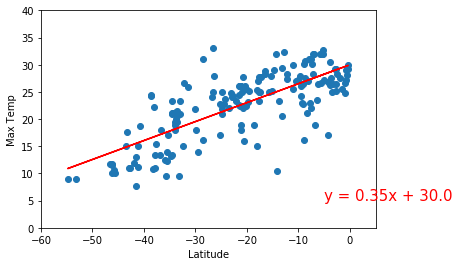

In [44]:
x = sou_hemi['Lat']
y = sou_hemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_line = (slope * x) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_line,"r-")
plt.annotate(line_eq,(-5,5),fontsize=15,color="red")
plt.ylim(0,40)
plt.xlim(-60, 5)
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
print(f'The r-squared is: {rvalue}')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.32952183354800973


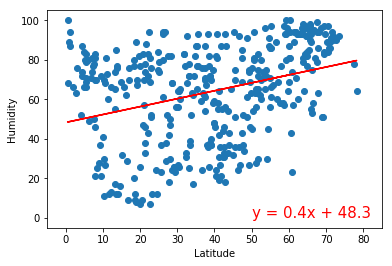

In [53]:
x = nor_hemi['Lat']
y = nor_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_line = (slope * x) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_line,"r-")
plt.annotate(line_eq,(50,0),fontsize=15,color="red")
plt.ylim(-5,105)
plt.xlim(-5, 85)
plt.ylabel("Humidity")
plt.xlabel("Latitude")
print(f'The r-squared is: {rvalue}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1255418997732647


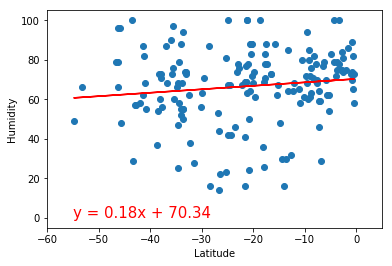

In [50]:
x = sou_hemi['Lat']
y = sou_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_line = (slope * x) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_line,"r-")
plt.annotate(line_eq,(-55,0),fontsize=15,color="red")
plt.ylim(-5,105)
plt.xlim(-60, 5)
plt.ylabel("Humidity")
plt.xlabel("Latitude")
print(f'The r-squared is: {rvalue}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


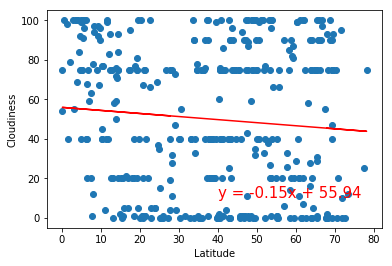

The r-squared is: 0.217838930210458


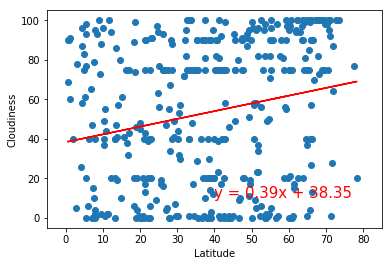

In [55]:
x = nor_hemi['Lat']
y = nor_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_line = (slope * x) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_line,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.ylim(-5,105)
plt.xlim(-5,85)
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
print(f'The r-squared is: {rvalue}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1233595225730416


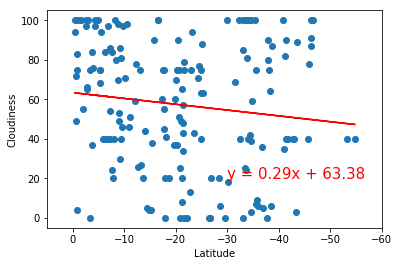

In [57]:
x = sou_hemi['Lat']
y = sou_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_line = (slope * x) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_line,"r-")
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
plt.ylim(-5,105)
plt.xlim(5,-60)
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
print(f'The r-squared is: {rvalue}')

####  Northern Hemisphere - Wind Speed (kph) vs. Latitude Linear Regression

The r-squared is: 0.10678169599050304


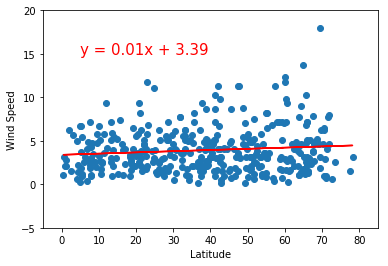

In [60]:
x = nor_hemi['Lat']
y = nor_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_line = (slope * x) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_line,"r-")
plt.annotate(line_eq,(5,15),fontsize=15,color="red")
plt.ylim(-5,20)
plt.xlim(-5,85)
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
print(f'The r-squared is: {rvalue}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.28025577744295194


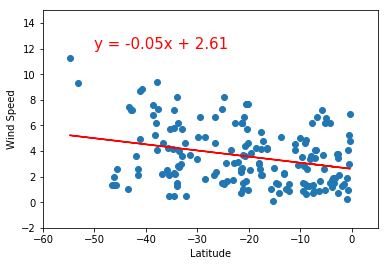

In [65]:
x = sou_hemi['Lat']
y = sou_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_line = (slope * x) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_line,"r-")
plt.annotate(line_eq,(-50,12),fontsize=15,color="red")
plt.ylim(-2,15)
plt.xlim(-60,5)
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
print(f'The r-squared is: {rvalue}')